# LOAD DATA SHOW DESCRPTIVES and DO t test FROM CSV FILE

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as scipy

## Theme and GUI

In [22]:
import sys
import PySimpleGUI as sg


sg.theme("material1")

'Material1'

# SOME BASIC GLOBALS FOR OUR work
### Number of observations

In [23]:
OBSERVATIONS_1=40
OBSERVATIONS_2=40

## INITIALIZE OUR DATA 

In [24]:
#f_name=sg.popup_get_text("Input file name to save as Joined/ Merged DOCX", title="Input merged DOCX file name",default_text="result")
file1=sg.popup_get_text("Enter name of CSV file with 2 COLUMNS to load",title="Input CSV File name",default_text="table1.csv", )
if not file1:
    sg.popup(f"File {file1} not found or access denied or empty", title="Failed", auto_close="5") 
    sys.exit()
if not os.path.isfile(file1):   
    sg.popup(f"File {file1} not found or access denied or empty", title="Failed", auto_close="5")


## Load the first 2 columns of the CSV and Initialize the global variables 

In [25]:
def Load_csv_2_column(FILE_):
    data_frame= pd.read_csv(FILE_, index_col=0, sep=",")
    sg.popup(f"Loaded file {FILE_}", title="Success", auto_close="5")
    sg.popup_scrolled(data_frame.head(), title="DATA HEAD")
    # Drop the header
    #data_frame.drop(0, axis="index")
    #sg.popup_scrolled(data_frame.head(), title="DATA HEAD NO header")
    global DATA1
    DATA1= data_frame.columns[0]
    global DATA2 
    DATA2= data_frame.columns[1]
    
    if not DATA1 or not DATA2:
        sg.popup("No data found") 
        sys.exit()
    #variable1=data_frame.iloc[].values
    #variable2=data_frame.iloc[].values
    global variable1
    variable1=data_frame[DATA1].to_numpy()
    
    global OBSERVATIONS_1
    OBSERVATIONS_1= variable1.size
    sg.popup(variable1, title=f"No of items {OBSERVATIONS_1}")
    #data_frame.loc[1,data_frame.columns[0]:]
    global variable2
    variable2=data_frame[DATA2].to_numpy()
    global OBSERVATIONS_2
    OBSERVATIONS_2= variable2.size
    sg.popup(variable2, title=f"No of items {OBSERVATIONS_2}")
    if not variable1.all() or not variable2.all(): 
        sg.popup("DATAFRAME IS EMPTY", titile="No content")
        sys.exit()
    if variable1.size==0 or variable2.size==0: 
        sg.popup("DATAFRAME IS EMPTY", titile="No content")
        sys.exit()    
        

# LOAD CSV

In [26]:
Load_csv_2_column(file1)

FileNotFoundError: [Errno 2] No such file or directory: 'table1.csv'

#### CHECK BY VIEWING WHOLE DATASET REMOVE IF SET IS LARGE SIZE

In [ ]:
sg.popup_scrolled(np.array2string(variable1, separator="___"), title=f"Complete Dataset :{DATA1}")
sg.popup_scrolled(np.array2string(variable2, separator="___"), title=f"Complete Dataset :{DATA2}")

'OK'

## DESCRIPTIVE SUMMARY
### Use SCIPY to load Desciriptive run of the data

In [ ]:
def DescribeScipy(var_):
    Nobs=np.round(scipy.stats.describe (var_).nobs,2)
    Max_min=scipy.stats.describe (var_).minmax
    Mean_=np.round(scipy.stats.describe (var_).mean,2)
    Variance_=np.round(scipy.stats.describe (var_).variance,2)
    Skew_=np.round(scipy.stats.describe (var_).skewness,2)
    Kurt_=np.round(scipy.stats.describe (var_).kurtosis,2)
    return f" Observations N = {Nobs} \n Minimum and Maximum= {Max_min}\n Mean= {Mean_}\nVariance ={Variance_} \n Skewness= {Skew_}\n Kurtosis = {Kurt_}"

## GENERATE 2 variances

In [ ]:
variance_1=np.round(np.var(variable1),2)
variance_2=np.round(np.var(variable2),2)

## Check the Condition of equal variance ( within 4x or 4 times)

In [ ]:
Equal_var= False

#.popup_scrolled(f"",  title="Data set 2",size=(27,27))

if variance_1 >= variance_2:
	if variance_1/ variance_2 < 4:
		sg.popup(f"{DATA1} and {DATA2} var almost equal, \nBut variance {DATA1} is higher > {DATA2}",  auto_close='5')
		Equal_var=True
		
if variance_1 < variance_2:		
	if variance_2/ variance_1 < 4:
		sg.popup(f"{DATA1} and {DATA2} var almost equal,\nBut variance  {DATA2} is higher > {DATA1}", auto_close='5')
		Equal_var=True	

# SHOW SUMMARY

In [ ]:
HR=100*'_'
desc1=DescribeScipy(variable1)
desc2=DescribeScipy(variable2)
sg.popup_scrolled(f"{DATA1}\n {HR}\n {variable1} \n\nVariance {variance_1}\n {desc1}\n{HR}\n{DATA2} \n {HR} \n{variable2} \n\nVariance {variance_2}\n{desc2}", title="Data sets 1 and 2", size=(127,27))

'OK'

## CHECK FOR NORMAL DISTRIBUTION OF THE DATA

In [ ]:
k, pvalueKS1=scipy.stats.normaltest(variable1)
#sg.popup(pvalueKS1)
strange=np.round(pvalueKS1, 4)
if pvalueKS1<0.05:
    sigK1=f"p={strange} sample data does not come from a normal distribution, \n {DATA1} Not Gaussian distribution"
else:
    sigK1=f"p={strange} sample data is from a normal distribution, \n {DATA1} Confirmed Gaussian distribution"
#sg.popup(sigK1)

c:\Python310\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### For 2nd data

In [ ]:
k, pvalueKS2=scipy.stats.normaltest(variable2)
if pvalueKS2<0.05:
    sigK2=f"p={np.round(pvalueKS2, 4)} sample data does not come from a normal distribution, \n {DATA2} Not Gaussian distribution"
else:
    sigK2=f"p={np.round(pvalueKS2, 4)} sample data is from a normal distribution, \n{DATA2} Confirmed Gaussian distribution"

c:\Python310\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Perform two sample, independent t-test with equal variances
## t_stat, p_value =stats.ttest_ind(a=variable1, b=variable1, equal_var=Equal_var)

In [ ]:
t_stat, p_value =scipy.stats.ttest_ind(a=variable1, b=variable2, equal_var=Equal_var)

## CHECK FOR SIGNIFICANCE -- that is what we need

In [ ]:
if p_value<0.05:
    	sig="Statistically Significant"
else:
	sig="Statistically NOT Significant"

## Generate the result string

In [ ]:

statistic= np.round(t_stat, 5)
pvalue=np.round(p_value, 5)

result=f"value of t is {statistic} and p value is ={pvalue}\n{sig} \n Shapiro-Wilk test for\n {DATA1} {sigK1}\n for {DATA2} {sigK2}."
sg.popup(result, title="Result of Biostatistical test")

'OK'

#### Create a PANDAS dataframe for storage and analysis

In [ ]:
data = {DATA1: variable1, DATA2: variable2,}
data_frame = pd.DataFrame(data, index=np.arange(1,OBSERVATIONS_1+1,1))

#### Generate an random string for saving

In [ ]:
ri = np.random.randint(11111,99999)
random_str = str(ri)

## SAVE OUR RESULTS

In [ ]:
if (sg.popup_yes_no("Save Table as CSV and result as TXT?")=='Yes'): 
    sg.popup('Saving this data as table')
    
    data_frame.to_csv(f"Table{random_str}.csv")
    with open(f'T_test_result{random_str}.txt','w') as fout:
       	fout.write(data_frame.to_string())
        fout.write('\n')
        fout.write(HR)
        fout.write('\n')
        fout.write(desc1)
        fout.write('\n')
        fout.write(HR)
        fout.write('\n')
        fout.write(desc2)
        fout.write('\n')
        fout.write(HR)
        fout.write('\n')
        fout.write(result)
        fout.write('\n')
        fout.write(HR)
        fout.close()

## PLOT THE RESULT

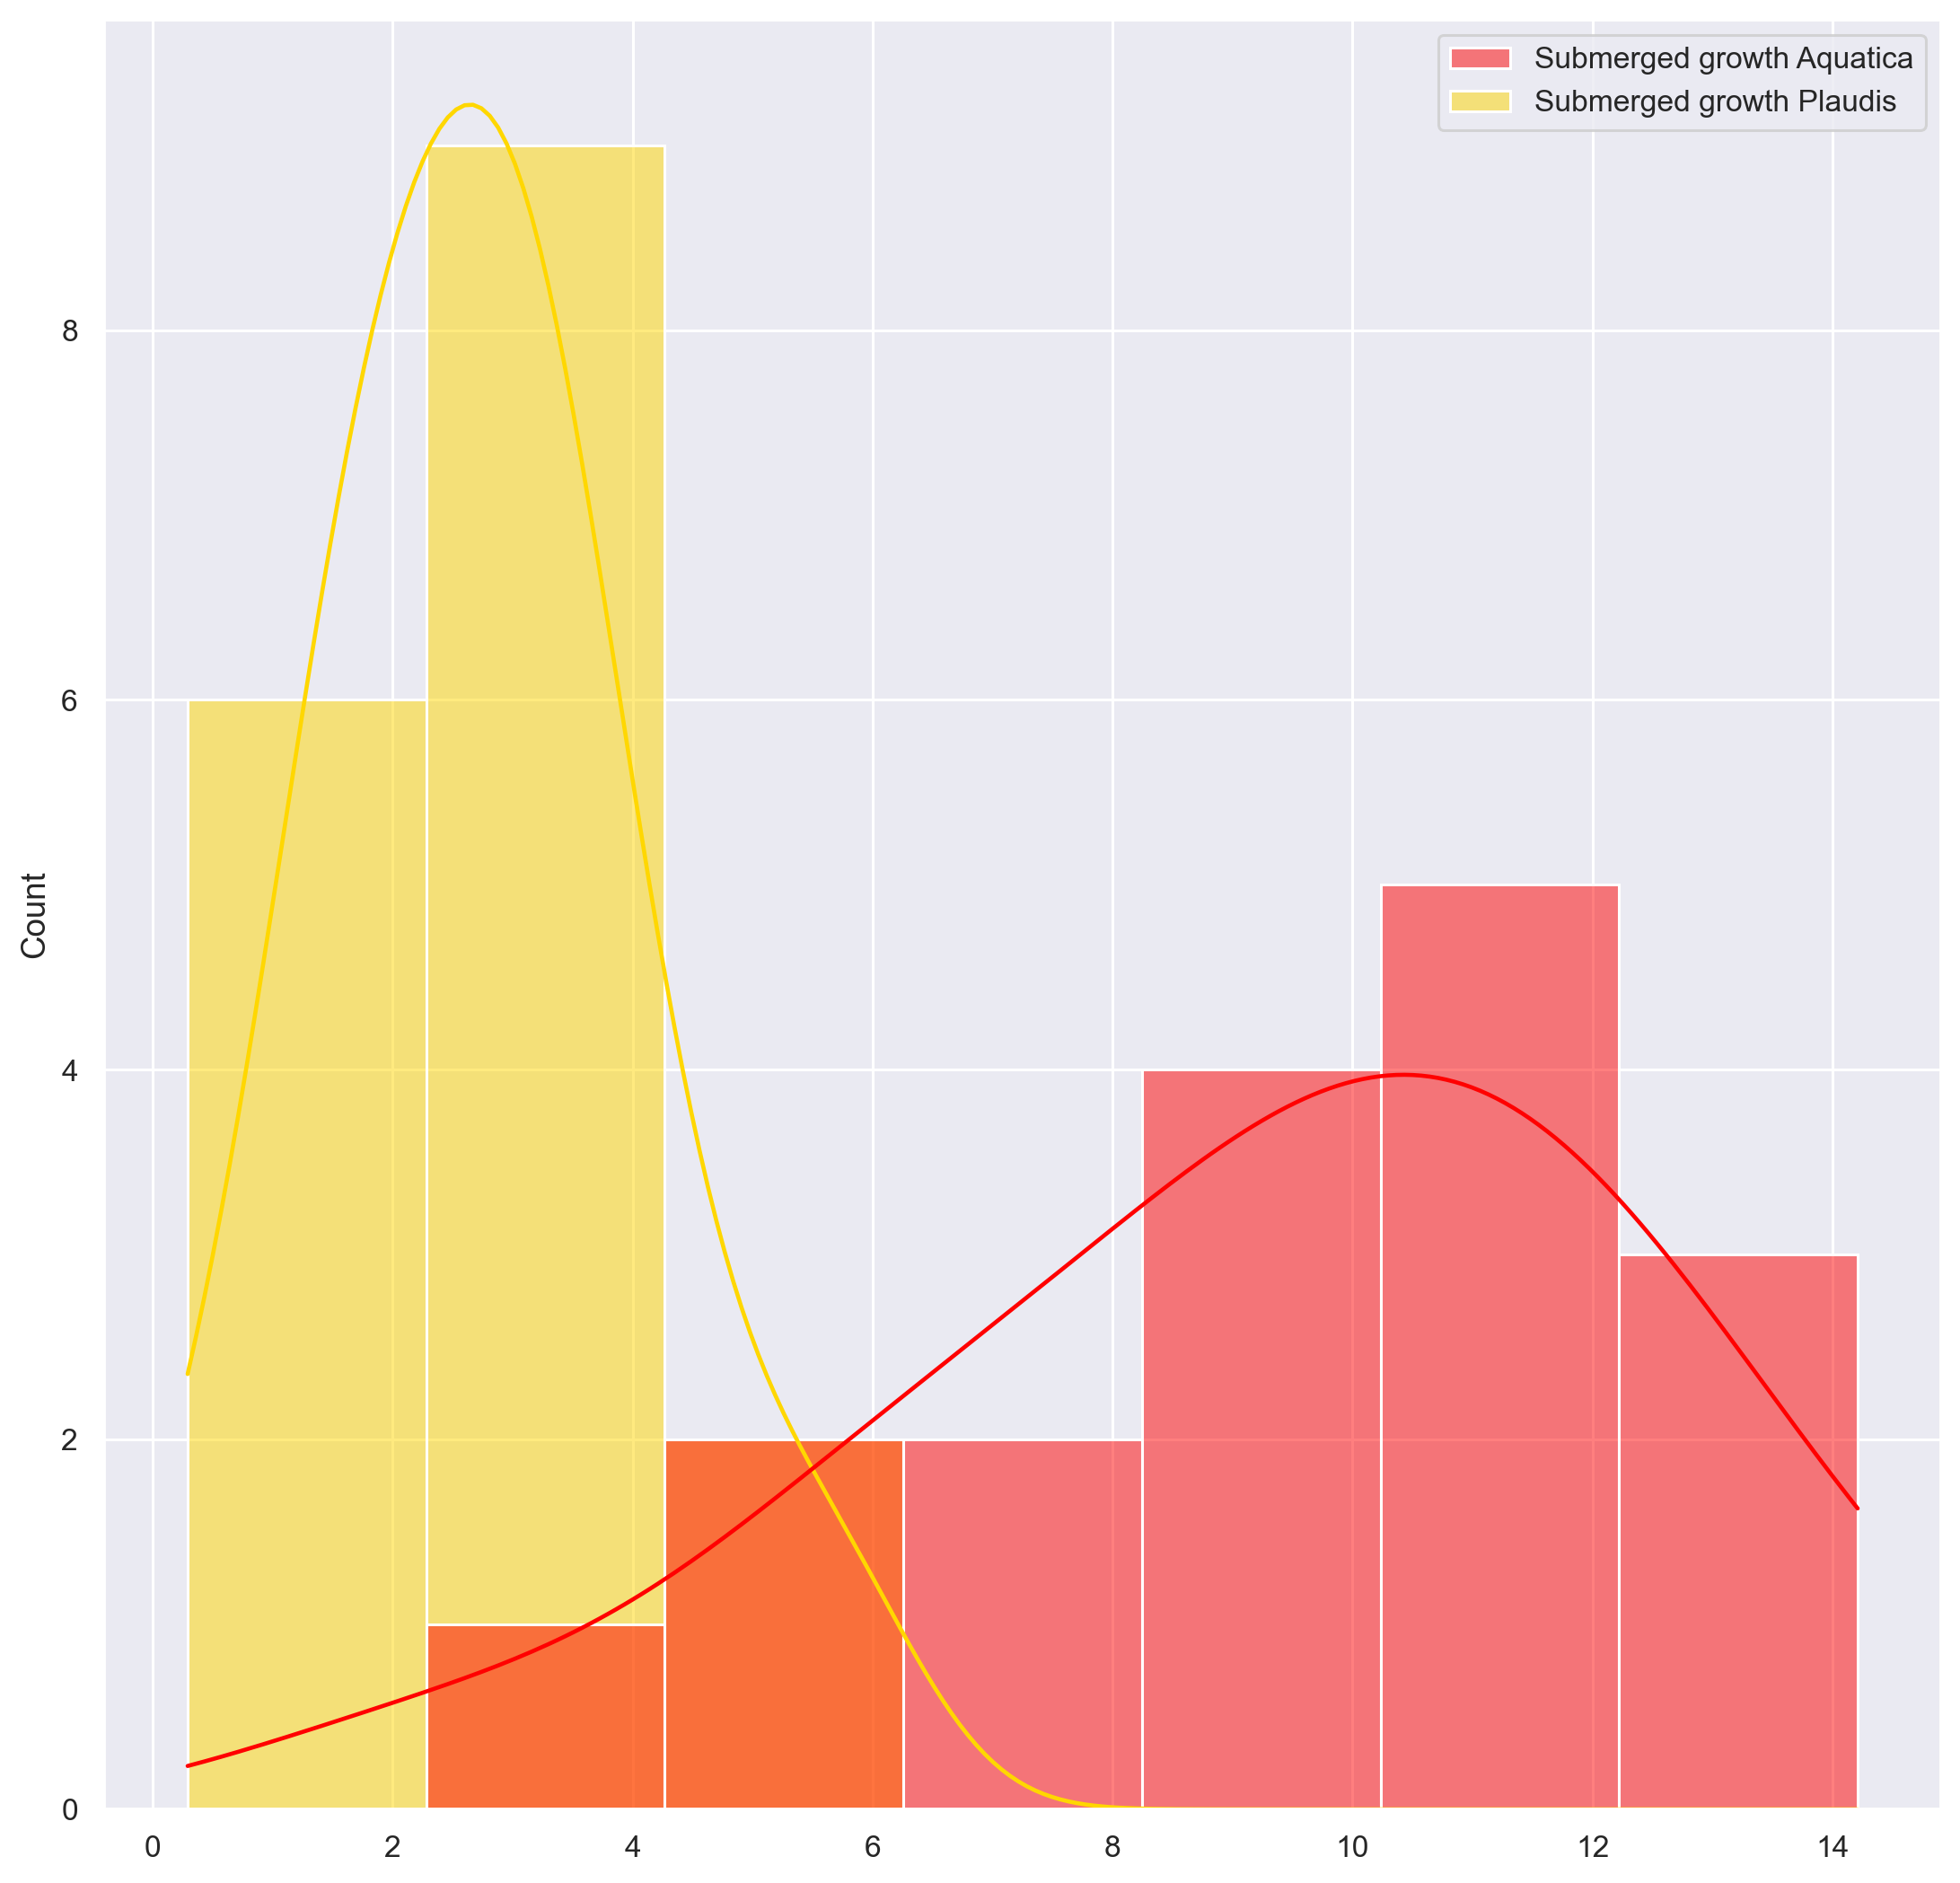

In [ ]:
sns.set_theme(style='darkgrid')

palette = {data_frame.columns[0]:"red",
           data_frame.columns[1]:"gold", }
        
plt.figure(figsize=(12,12), dpi=220)
sns.histplot(data=data_frame,kde=True, palette=palette)

TITLE1=f'Observed differences in two dataset {DATA1} and {DATA2} '
#x='Leaf length in Centimeters', y='No of specimens',data=leaf_length_plaudis, kde=True)
#plt.title(TITLE1)
#TITLE1=f'{TITLE1}_{random.randrange(0,100)}'

if (sg.popup_yes_no("Save the Graph?")=='Yes'): 
    plt.savefig(f"{TITLE1} {random_str}.png")
    plt.savefig(f"{TITLE1} {random_str}.svg")
plt.show()